In [3]:
import hddm
import pandas as pd
import numpy as np
import itertools
import warnings
#Loads files into structured array
data_dir = '/home/kyle/Dropbox/Projects/Consulting/CogModeling/datasets'
data = hddm.load_csv(os.path.join(data_dir, 'simple_subjs_difficulty.csv'))
# data = data.rename(columns={'sid':'subj_idx'})
#Data grooming
# rtSig = data.rt.std()
# rtMu = data.rt.mean()
# cutoff =  rtMu - rtSig
# data = data[data.rt>cutoff]
# data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,response,rt,difficulty,subj_idx
0,1.0,1.929,easy,0
1,1.0,1.709,easy,0
2,0.0,0.918,easy,0
3,1.0,0.559,easy,0
4,1.0,1.132,easy,0


In [5]:
#Run model fit
m=hddm.HDDM(data, depends_on={'v':'difficulty'}, bias=False, include=['v', 't', 'a'],  p_outlier=.015)
m.find_starting_values()
m.sample(1000, burn=500)

-1160.938722515944
-1160.9381143765665
 [-----------------100%-----------------] 1000 of 1000 complete in 15.6 sec

In [6]:
#simulate data from the model, by default using 500 parameter values from the posterior samples and simulate a 
#different df for each parameter value
#append observed data of each node to the replications
sim_data=hddm.utils.post_pred_gen(m, append_data=True)

 [---------------------------------------------250%----------------------------------------------] 5 of 2 complete in 78.5 sec

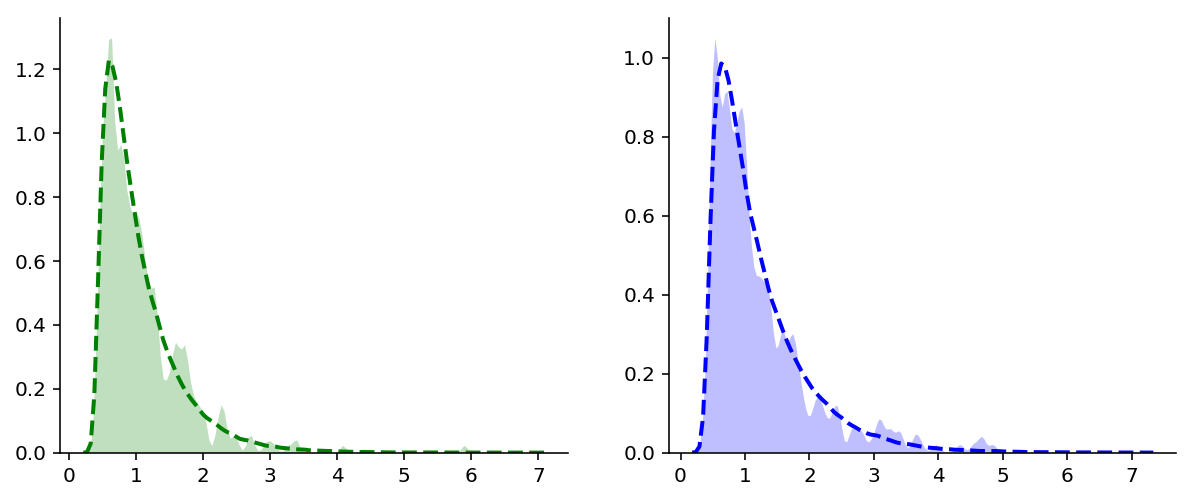

In [31]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
rtsim = sdf[(sdf.node=='easy')&(sdf.response_sampled==1)].rt_sampled
rtobs = sdf[(sdf.node=='easy')&(sdf.response==1)].rt

rtsim2 = sdf[(sdf.node=='hard')&(sdf.response_sampled==1)].rt_sampled
rtobs2 = sdf[(sdf.node=='hard')&(sdf.response==1)].rt

sns.kdeplot(rtsim.values, shade=False, linestyle='--', lw=2, ax=ax1, color='g')
sns.kdeplot(rtobs.values, shade=True, lw=0, ax=ax1, color='g')
sns.kdeplot(rtsim2.values, shade=False, linestyle='--', lw=2, ax=ax2, color='b')
sns.kdeplot(rtobs2.values, shade=True, lw=0, ax=ax2, color='b')

sns.despine()

In [23]:
sdf = simdf.reset_index()
sdf.groupby('node').mean()


,sample,level_2,rt_sampled,response_sampled,index,response,rt
node,,,,,,,
easy,249.5,249.5,0.8158,0.8890,749.5,0.890,0.8229
hard,249.5,249.5,0.6088,0.7504,249.5,0.744,0.5969


In [ ]:
#compute the summary statistics over each simulated dataset and compare that to the summary statistic of the actual data
sim_compare=hddm.utils.post_pred_stats(data, sim_data, call_compare=True)
#observed is the value of the summary stat of original data, mean is summary stat of simulated data (these should match closely.)
#the rest measures how far the summary stat of the data is away from the summary stat of the stim data
print(sim_compare)

In [16]:
#observed is the value of the summary stat of original data, mean is summary stat of simulated data (these should match closely.)
#the rest measures how far the summary stat of the data is away from the summary stat of the stim data
sim_compare

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.8170,0.8170,7.3000e-02,8.9284e-11,5.3290e-03,True,50.00,0.0001
mean_ub,1.1448,1.1516,7.6521e-02,4.6555e-05,5.9022e-03,True,50.00,0.0892
std_ub,0.7054,0.7032,9.7565e-02,4.7516e-06,9.5237e-03,True,50.00,0.0223
10q_ub,0.5280,0.5286,5.5005e-04,3.1032e-07,6.0501e-07,True,25.05,1.0128
30q_ub,0.7168,0.7068,2.3450e-02,9.9131e-05,6.4892e-04,True,50.00,0.4246
50q_ub,0.9370,0.9485,3.2500e-02,1.3235e-04,1.1885e-03,True,50.00,0.3540
70q_ub,1.2652,1.2741,7.4300e-02,7.9137e-05,5.5997e-03,True,50.00,0.1197
90q_ub,1.9586,2.0079,2.1830e-01,2.4307e-03,5.0085e-02,True,50.00,0.2258
mean_lb,-1.2318,-1.2279,9.7385e-03,1.5179e-05,1.0993e-04,True,50.00,0.4001


In [17]:
simdf = hddm.utils.post_pred_gen(m, groupby='difficulty', append_data=True)

 [---------------------------------------------250%----------------------------------------------] 5 of 2 complete in 76.9 sec

In [19]:
#compute the summary statistics over each simulated dataset and compare that to the summary statistic of the actual data
sim_compare2=hddm.utils.post_pred_stats(data, simdf, call_compare=True)

In [20]:
sim_compare2

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.8170,0.8170,7.3000e-02,8.9284e-11,5.3290e-03,True,50.00,0.0001
mean_ub,1.1448,1.1516,7.6521e-02,4.6555e-05,5.9022e-03,True,50.00,0.0892
std_ub,0.7054,0.7032,9.7565e-02,4.7516e-06,9.5237e-03,True,50.00,0.0223
10q_ub,0.5280,0.5286,5.5005e-04,3.1032e-07,6.0501e-07,True,25.05,1.0128
30q_ub,0.7168,0.7068,2.3450e-02,9.9131e-05,6.4892e-04,True,50.00,0.4246
50q_ub,0.9370,0.9485,3.2500e-02,1.3235e-04,1.1885e-03,True,50.00,0.3540
70q_ub,1.2652,1.2741,7.4300e-02,7.9137e-05,5.5997e-03,True,50.00,0.1197
90q_ub,1.9586,2.0079,2.1830e-01,2.4307e-03,5.0085e-02,True,50.00,0.2258
mean_lb,-1.2318,-1.2279,9.7385e-03,1.5179e-05,1.0993e-04,True,50.00,0.4001


In [10]:
data.groupby('difficulty').mean()

,response,rt
difficulty,,
easy,0.890,1.0909
hard,0.744,1.2306


In [14]:
sim_data.groupby('difficulty').mean()

,rt_sampled,response_sampled,index,response,rt
difficulty,,,,,
easy,0.8110,0.8863,749.5,0.890,0.8229
hard,0.6089,0.7504,249.5,0.744,0.5969


In [9]:
sim_compare

accuracy  mean_ub  std_ub  10q_ub  30q_ub  50q_ub  70q_ub  \
wfpt(easy) 0       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           1       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           2       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           3       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           4       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           5       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           6       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           7       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           8       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
           9       0.890   1.0751  0.6057  0.5280  0.6834   0.916  1.1998   
...                  ...      ...     ...     ...     ...     ...     ...   
wfpt(hard) 490     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           491     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           492     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           493     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           494     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           495     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           496     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           497     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           498     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   
           499     0.744   1.2282  0.8008  0.5291  0.7303   0.981  1.3484   

                90q_ub  mean_lb  std_lb  10q_lb  30q_lb  50q_lb  70q_lb  \
wfpt(easy) 0    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           1    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           2    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           3    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           4    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           5    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           6    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           7    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           8    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
           9    1.7896  -1.2182  0.7709  0.5106  0.7086   0.946  1.3484   
...                ...      ...     ...     ...     ...     ...     ...   
wfpt(hard) 490  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           491  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           492  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           493  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           494  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           495  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           496  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           497  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           498  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   
           499  2.2262  -1.2377  0.7708  0.5739  0.7484   1.092  1.3679   

                90q_lb  
wfpt(easy) 0    2.2134  
           1    2.2134  
           2    2.2134  
           3    2.2134  
           4    2.2134  
           5    2.2134  
           6    2.2134  
           7    2.2134  
           8    2.2134  
           9    2.2134  
...                ...  
wfpt(hard) 490  1.9526  
           491  1.9526  
           492  1.9526  
           493  1.9526  
           494  1.9526  
           495  1.9526  
           496  1.9526  
           497  1.9526  
           498  1.9526  
           499  1.9526  

[1000 rows x 15 columns]

In [ ]:
#say you want to perform model comparison to test which model explains the data better or assess whether conditions are different
#run a model with no parameters dependent on condition
m_pooled = hddm.HDDM(data) # v does not depend on conditions
m_pooled.sample(3000, burn=500)

sim_data_pooled = hddm.utils.post_pred_gen(m_pooled, groupby=['Block', 'Session'])
#comparen=, look at the accuracy (mean_ub) and the MSE
compare_pool=hddm.utils.post_pred_stats(m_pooled, sim_data, call_compare=False)